In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_recipes = pd.read_csv("recipes_info.csv")

In [3]:
df_recipes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 14 columns):
recipe_id                260 non-null int64
country                  260 non-null object
country_secondary        260 non-null object
dish_category            252 non-null object
dish_type                260 non-null object
diet_type                260 non-null object
carbohydrate_base        260 non-null object
carbohydrate_category    230 non-null object
protein                  224 non-null object
protein_cut              241 non-null object
protein_type             224 non-null object
family_friendly          260 non-null object
spice_level              260 non-null object
prep_time                260 non-null object
dtypes: int64(1), object(13)
memory usage: 28.6+ KB


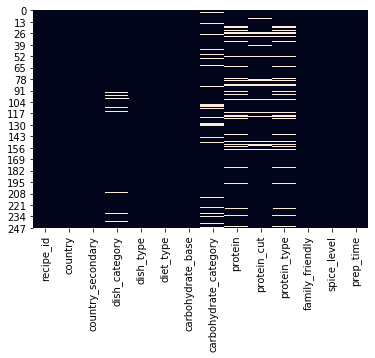

In [4]:
sns.heatmap(df_recipes.isnull(), cbar=False)

In [5]:
print(df_recipes.isnull().sum())

recipe_id                 0
country                   0
country_secondary         0
dish_category             8
dish_type                 0
diet_type                 0
carbohydrate_base         0
carbohydrate_category    30
protein                  36
protein_cut              19
protein_type             36
family_friendly           0
spice_level               0
prep_time                 0
dtype: int64


In [6]:
df_objects = df_recipes.select_dtypes(include=['object']).copy()

for col in df_objects.columns:
    print()
    print(f"Column {col} has {len(df_objects[col].unique())} unique values")
    print()
    print(df_objects[col].value_counts().head(10))
    print("-_-"*25)



Column country has 40 unique values

Italy             46
India             31
China             21
United Kingdom    16
Morocco           15
Japan             13
Mexico            13
France            13
Great Britain     11
United States     10
Name: country, dtype: int64
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-

Column country_secondary has 38 unique values

Italy                             41
India                             29
Great Britain                     24
China                             21
Morocco                           18
Mexico                            15
Japan                             14
France                            13
United States of America (USA)    10
Spain                              9
Name: country_secondary, dtype: int64
-_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_--_-

Column dish_category has 7 unique values

Stove top / bowl food    100
Protein&Veg               80
Finger food    

In [245]:
df_recipes["family_friendly"].replace("no", "No", inplace = True)
df_recipes["carbohydrate_category"] = df_recipes["carbohydrate_category"].fillna(df_recipes["carbohydrate_base"])

Ordering by recipe_id


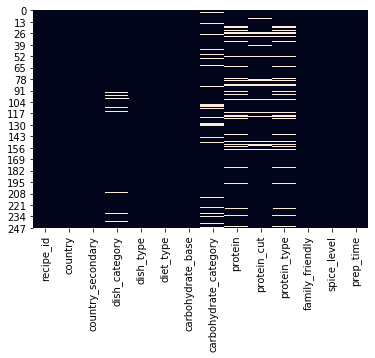

Ordering by country


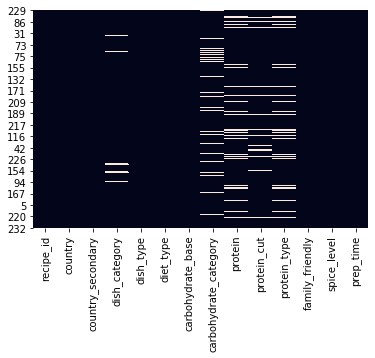

Ordering by country_secondary


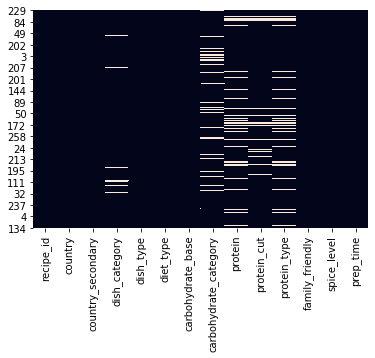

Ordering by dish_category


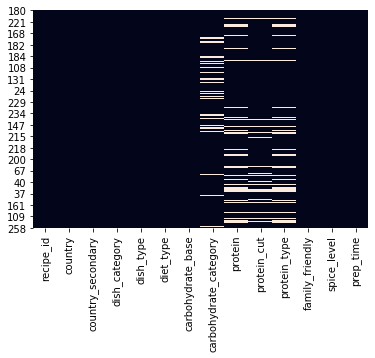

Ordering by dish_type


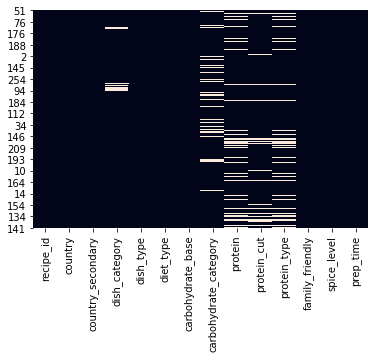

Ordering by diet_type


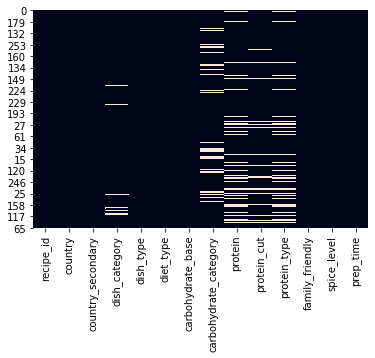

Ordering by carbohydrate_base


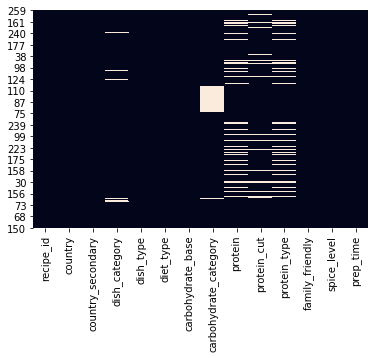

Ordering by carbohydrate_category


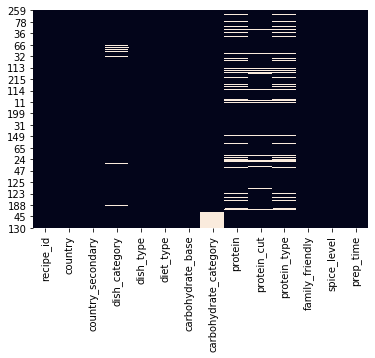

Ordering by protein


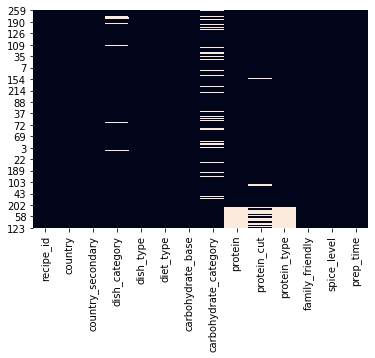

Ordering by protein_cut


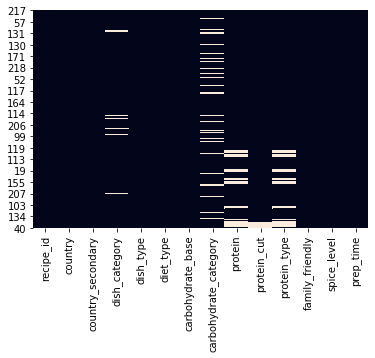

Ordering by protein_type


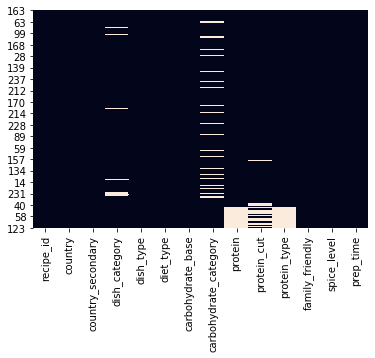

Ordering by family_friendly


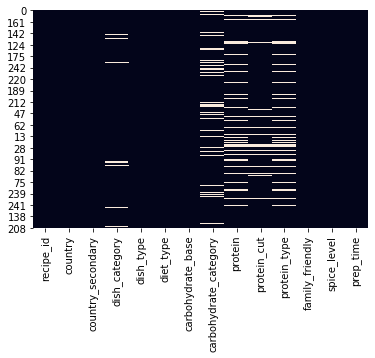

Ordering by spice_level


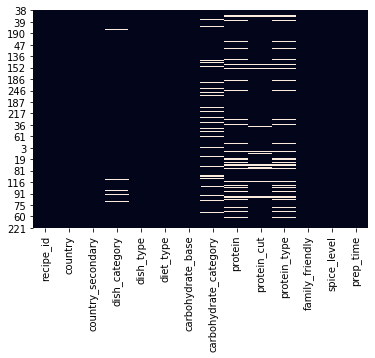

Ordering by prep_time


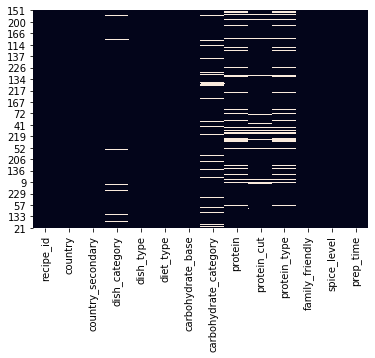

In [7]:
columns = df_recipes.columns.values

for column in columns:
    print(f"Ordering by {column}")
    sns.heatmap(df_recipes.sort_values(by=[column], inplace=False).isnull(), cbar=False)
    plt.show()

In [255]:
# df_recipes.loc[df_recipes.carbohydrate_base == "Carb not found", 'carbohydrate_category'] = "Carb not found"
import math

pairs = [
    ("protein_cut", "protein_type"),
    ("protein_cut", "protein"),
    ("carbohydrate_base", "carbohydrate_category"),
    ("dish_type", "dish_category"),
    ("diet_type", "protein_type"),
    ("diet_type", "protein"),
    ("diet_type", "protein_cut"),
]

for pair in pairs:
    source, target = pair

    uniques = df_recipes[df_recipes[target].isna()][source].unique()

    uniques = [x for x in uniques if str(x) != 'nan']

    print(uniques)

    for val in uniques:
        print(val)
        print(f"{source}, {target}")
        print(df_recipes[df_recipes[source] == val][target].value_counts())

        print(df_recipes[df_recipes[source] == val][[source, target]].head(5))

        df_unique = df_recipes[df_recipes[source] == val][target].value_counts().rename_axis('unique_values').reset_index(name='counts')

        if not df_unique.empty:
            df_recipes.loc[[(df_recipes[source] == val) & (df_recipes[target].isnull())][0], target] = df_unique.iloc[0]['unique_values']

        print("_-"*40)

[]
[]
[]
[]
[]
[]
['Vegetarian', 'Vegan', 'Meat']
Vegetarian
diet_type, protein_cut
Cheddar              12
Feta                  6
Eggs                  6
Chickpeas             5
Goats Cheese          5
Protein not found     4
Mozzarella            4
Halloumi              4
Black beans           3
Canned lentils        2
Cannellini beans      2
Butter beans          1
Paneer                1
Name: protein_cut, dtype: int64
    diet_type protein_cut
4  Vegetarian        Eggs
5  Vegetarian        Feta
6  Vegetarian     Cheddar
7  Vegetarian    Halloumi
8  Vegetarian         NaN
_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-
Vegan
diet_type, protein_cut
Protein not found    3
Feta                 1
Eggs                 1
Vegetables           1
Name: protein_cut, dtype: int64
   diet_type        protein_cut
2      Vegan  Protein not found
10     Vegan                NaN
13     Vegan               Feta
40     Vegan                NaN
93     Vegan  Protein 

In [124]:
df_recipes[df_recipes.diet_type == "Vegetarian"].protein_type.value_counts()

Dairy & Eggs    34
Pulses          13
Vegetarian       1
Name: protein_type, dtype: int64

In [251]:
df_recipes[df_recipes["diet_type"]=="Meat"]["protein_type"].value_counts()

Poultry & Meat    105
Dairy & Eggs       17
Pulses             13
Name: protein_type, dtype: int64

260

In [237]:
df_recipes['carbohydrate_category'].value_counts()

Rice       78
Potato     43
Bread      36
Grains     32
Pasta      22
Noodles    19
Name: carbohydrate_category, dtype: int64

In [259]:
df_recipes[df_recipes['diet_type'] == "Fish"][[source, target]].head(10)

,diet_type,protein_cut
0,Fish,Prawns
3,Fish,Trout
18,Fish,Salmon
43,Fish,Basa
44,Fish,Basa
54,Fish,Basa
57,Fish,Basa
62,Fish,Basa
67,Fish,Basa
68,Fish,Cheddar


In [260]:
df_recipes[df_recipes['carbohydrate_category'].isnull()][[source, target]].head(10)

,diet_type,protein_cut


In [261]:
df_recipes[df_recipes.protein_type.isnull()][["protein_cut", "protein_type"]].head(10)

,protein_cut,protein_type


In [262]:
df_recipes[df_recipes.dish_type == "Cheese salad"].head(10)

,recipe_id,country,country_secondary,dish_category,dish_type,diet_type,carbohydrate_base,carbohydrate_category,protein,protein_cut,protein_type,family_friendly,spice_level,prep_time
36,258,Italy,Italy,Salads,Cheese salad,Vegetarian,Ciabatta,Bread,Cheese,Mozzarella,Dairy & Eggs,No,No Spice,15
111,448,Mexico,Mexico,Salads,Cheese salad,Vegetarian,Bulgur wheat,Grains,Beans,Black beans,Pulses,No,Spicy,20
231,1200,Morocco,Morocco,Salads,Cheese salad,Vegetarian,chickpeas,chickpeas,Beans,Chickpeas,Pulses,No,No Spice,15


In [264]:
df_recipes.to_csv("recipes_imputed_manual.csv", index=False)